# Train stats

Every week we batch up all the change on the mainline branch and deploy that delta to production. We collect the number of patches for each train.

In [96]:
import pandas as pdb
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# We've tracked this since 1.31
dfs = [pdb.read_csv(f'patches-for-1.3{i}.0.tsv',
              sep='\t',
              header=None,
              names=['version', 'patches']
             ) for i in range(1, 6)]

# This is the insane way pandas makes you read csv files in a loop :(
df = pdb.concat(dfs, axis=0, ignore_index=True)

The data associates each train version with a number of patches. Here's a preview of what the data looks like:

In [97]:
print(df.head())
print(df.describe())

         version  patches
0   1.31.0-wmf.1      399
1   1.31.0-wmf.2      172
2   1.31.0-wmf.3      351
3   1.31.0-wmf.4      264
4  1.31.0-wmf.11      335
          patches
count  100.000000
mean   403.050000
std    153.116604
min    172.000000
25%    288.000000
50%    362.500000
75%    469.500000
max    824.000000


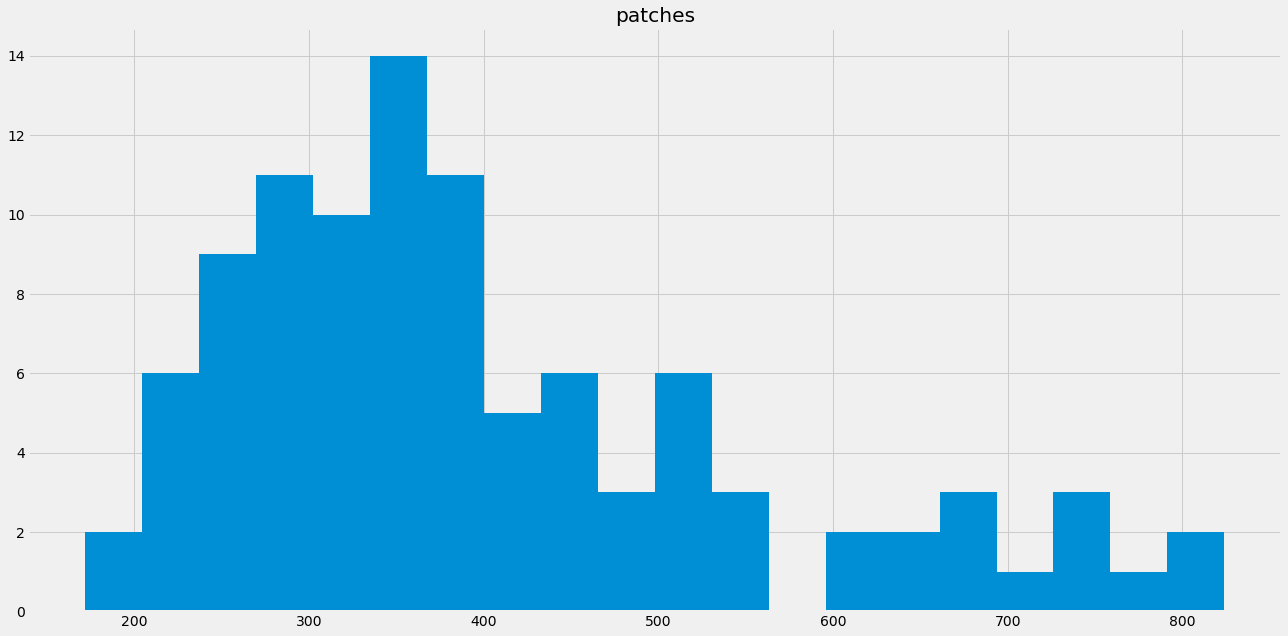

In [98]:
df.hist(bins=20, figsize=(20, 10))
plt.show()

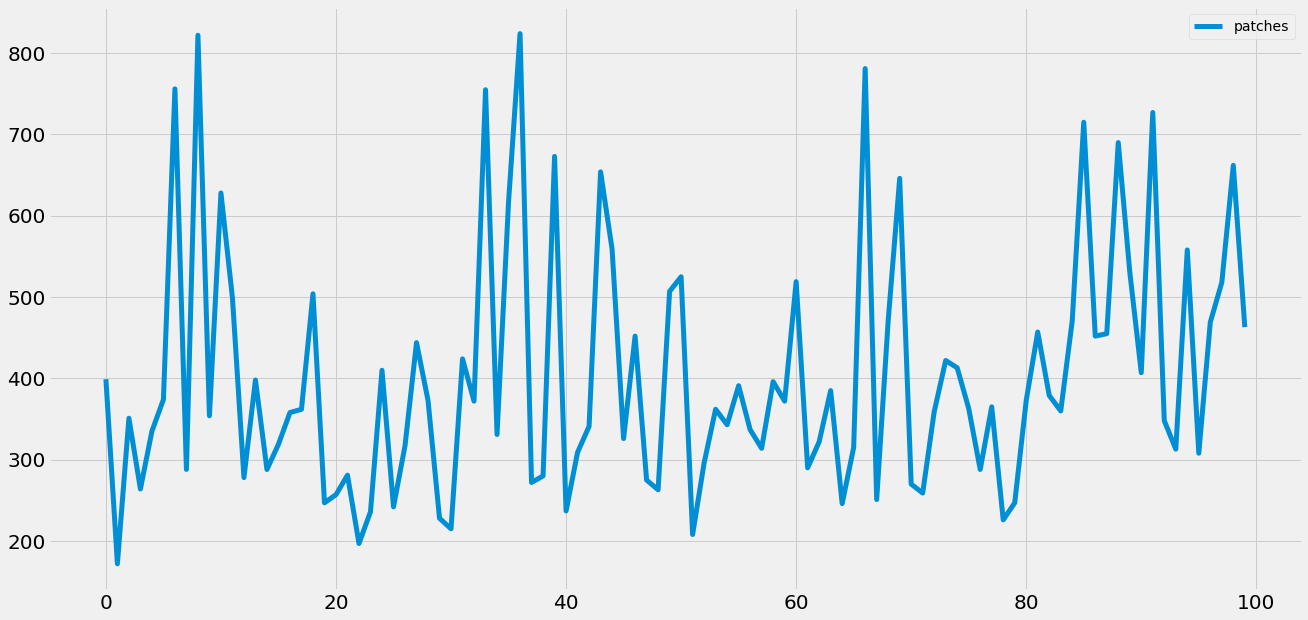

In [99]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

## Trends in train size

Looking at the rolling average train size, it's on the uptick in terms of number of patches per train for the last 30 trains.

In [100]:
df.set_index('version', inplace=True)

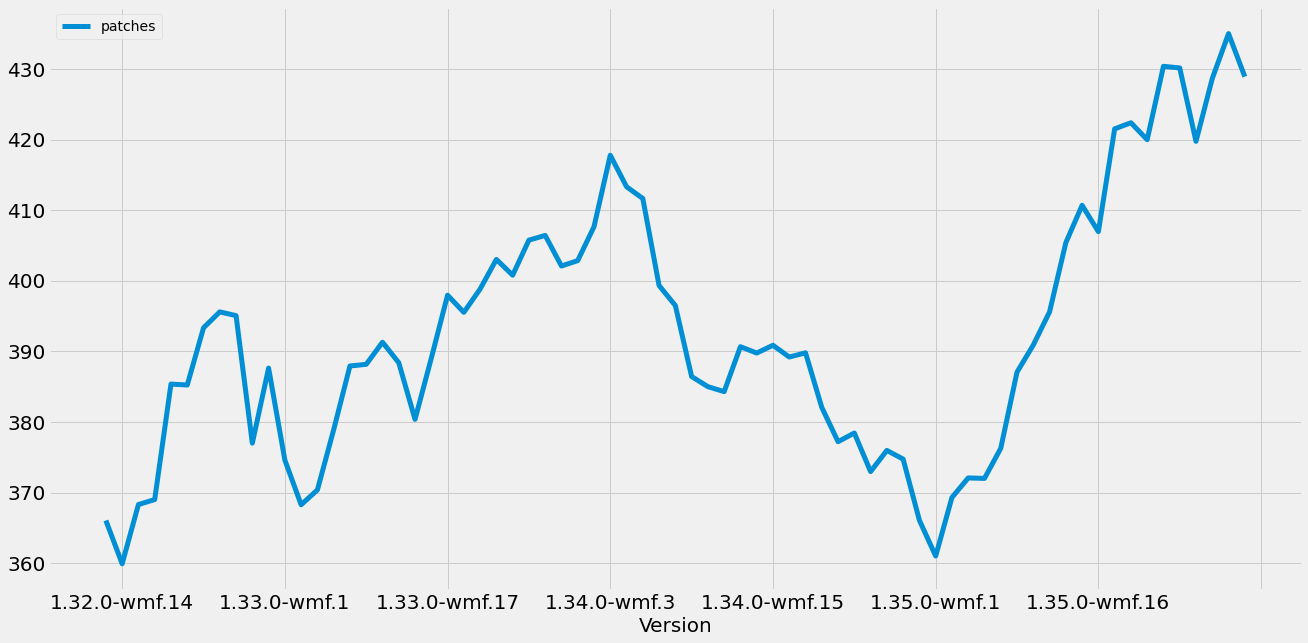

In [101]:
df[['patches']].rolling(30).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Version', fontsize=20)
plt.show()

# Rollbacks

In [102]:
rollbacks = pdb.read_csv('rollbacks1_31-1_36.tsv',
                         sep='\t',
                         header=None,
                         names=['version', 'rollback_count'])
rollbacks.head()

,version,rollback_count
0,1.36.0-wmf.36,3
1,1.36.0-wmf.35,3
2,1.36.0-wmf.34,1
3,1.36.0-wmf.33,1
4,1.36.0-wmf.30,1


In [103]:
train_stats = df.merge(rollbacks, on='version')
train_stats.set_index('version', inplace=True)
train_stats.head()

,patches,rollback_count
version,,
1.31.0-wmf.1,399,1
1.31.0-wmf.4,264,1
1.31.0-wmf.15,756,1
1.31.0-wmf.21,354,2
1.31.0-wmf.22,628,2


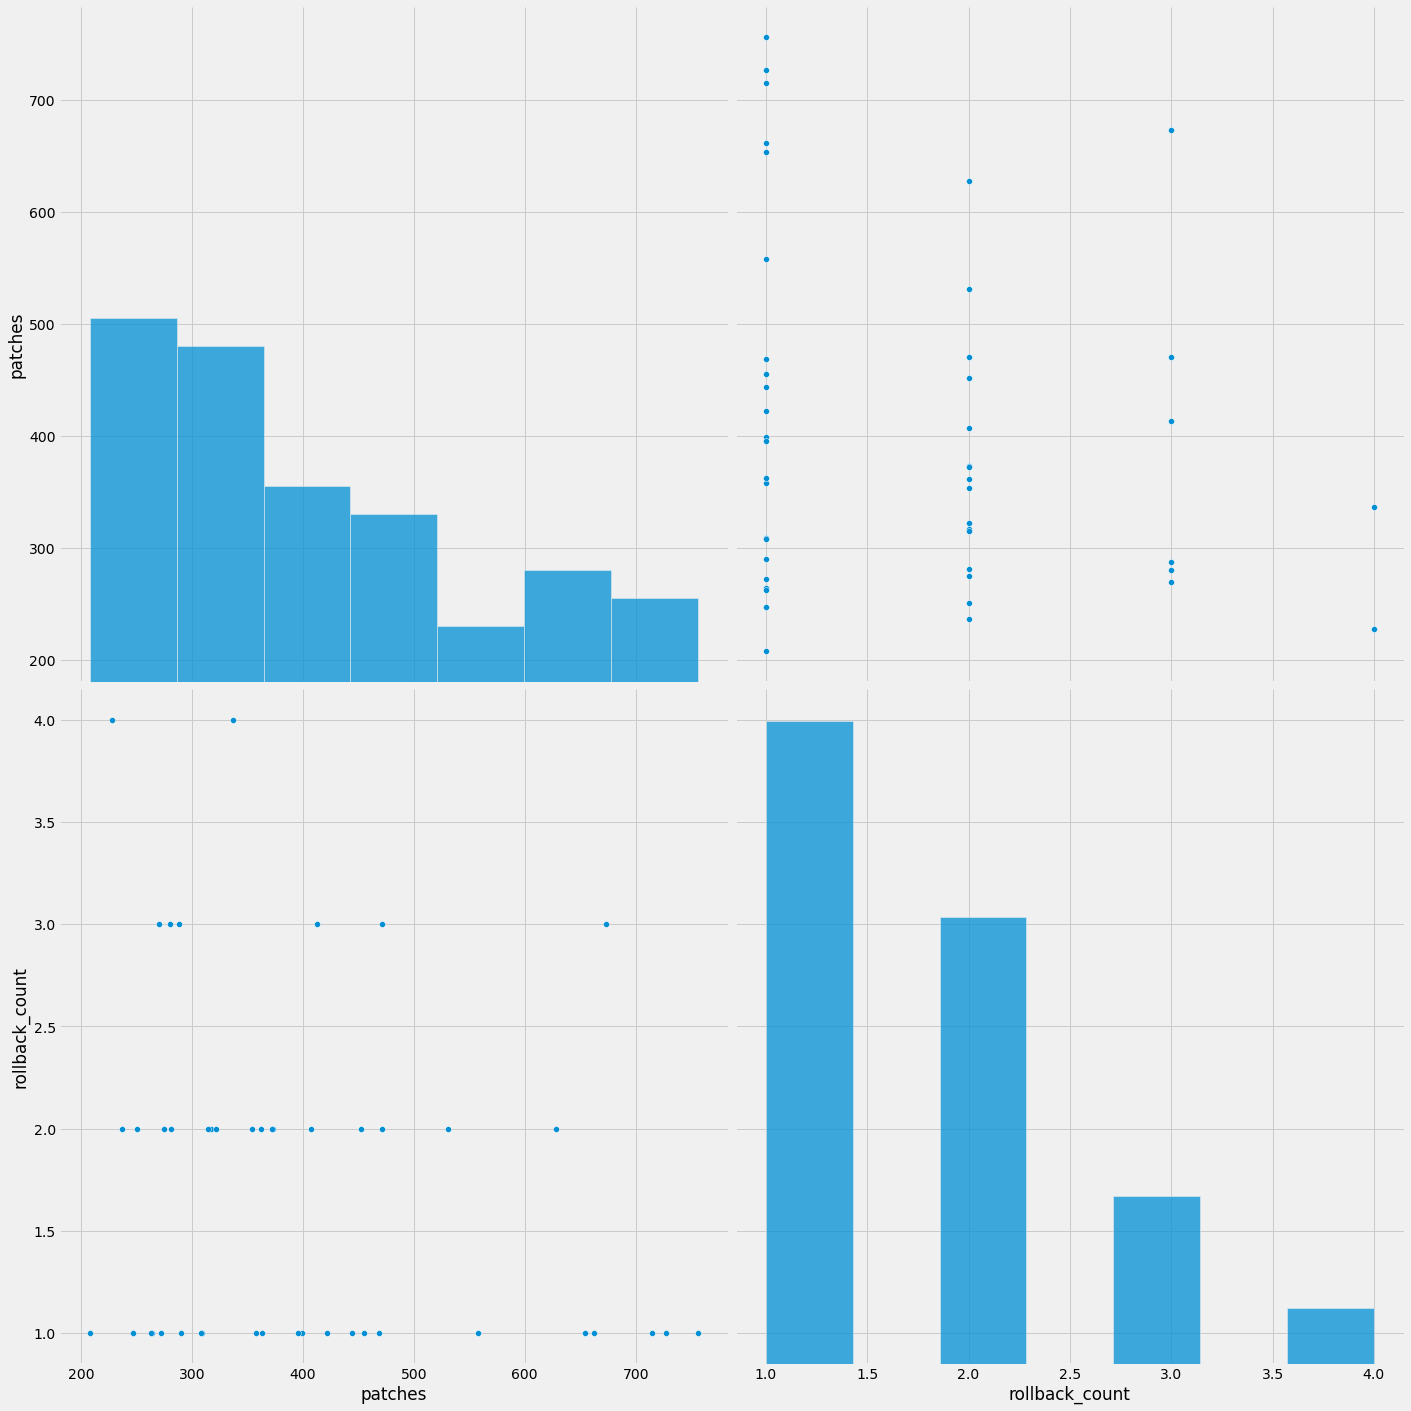

In [104]:
sns.pairplot(train_stats, height=10)